In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

from sklearn.model_selection import train_test_split 

In [3]:
df = pd.read_csv('train (1).csv' , usecols=['Age' , 'Fare' , 'Survived'])

In [4]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [5]:
df.isnull().mean() * 100

Survived     0.00000
Age         19.86532
Fare         0.00000
dtype: float64

In [6]:
x = df.drop(columns='Survived' , axis = 1)
y = df['Survived']

In [7]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size = 0.2 , random_state = 42)

In [8]:
x_train

,Age,Fare
331,45.5,28.5000
733,23.0,13.0000
382,32.0,7.9250
704,26.0,7.8542
813,6.0,31.2750
...,...,...
106,21.0,7.6500
270,NaN,31.0000
860,41.0,14.1083
435,14.0,120.0000


In [9]:
x_train['Age_imputed'] = x_train['Age']
x_test['Age_imputed'] = x_test['Age']

In [10]:
x_test.tail()

,Age,Fare,Age_imputed
433,17.0,7.1250,17.0
773,NaN,7.2250,NaN
25,38.0,31.3875,38.0
84,17.0,10.5000,17.0
10,4.0,16.7000,4.0


In [12]:
x_train['Age_imputed'][x_train['Age_imputed'].isnull()] = x_train['Age'].dropna().sample(x_train['Age'].isnull().sum()).values
x_test['Age_imputed'][x_test['Age_imputed'].isnull()] = x_train['Age'].dropna().sample(x_test['Age'].isnull().sum()).values

C:\Users\Administrator\AppData\Local\Temp\ipykernel_652\547872810.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  x_train['Age_imputed'][x_train['Age_imputed'].isnull()] = x_train['Age'].dropna().sample(x_train['Age'].isnull().sum()).val

In [13]:
x_train['Age'].dropna().sample(x_train['Age'].isnull().sum()).values

array([27.  , 25.  ,  0.92, 46.  , 24.  ,  1.  , 32.  , 28.  , 51.  ,
       19.  , 38.  , 28.  , 36.  , 17.  , 30.  , 31.  , 64.  , 59.  ,
       34.  , 26.  , 54.  , 36.  , 22.  , 24.  , 42.  , 30.  , 22.  ,
        3.  , 52.  , 28.  , 28.  , 54.  , 48.  , 31.  , 18.  , 44.  ,
       51.  , 21.  , 22.  , 35.  , 45.  , 24.  , 36.  , 28.  , 45.  ,
       24.  , 42.  , 48.  , 25.  , 19.  , 19.  , 24.  , 47.  , 21.  ,
        9.  , 20.  , 28.  , 42.  , 21.  ,  9.  , 48.  , 18.  , 25.  ,
       26.  , 25.  , 62.  ,  0.67, 59.  , 28.5 , 19.  , 41.  , 24.  ,
       28.  , 51.  , 58.  , 19.  , 80.  , 50.  , 40.5 , 21.  , 35.  ,
       33.  , 26.  , 24.  , 23.  , 26.  , 22.  , 25.  , 32.  , 37.  ,
       18.  , 49.  , 25.  , 25.  ,  1.  , 52.  , 30.  , 47.  , 18.  ,
       25.  ,  5.  , 58.  , 19.  , 34.  , 21.  , 20.  , 30.  , 22.  ,
       24.  , 16.  , 22.  , 38.  , 19.  , 21.  , 56.  , 39.  , 58.  ,
       25.  , 35.  , 24.  , 20.  , 47.  , 15.  , 14.5 , 36.  , 50.  ,
       36.  , 39.  ,

In [14]:
x_train['Age'].isnull().sum()

np.int64(140)

In [15]:
x_train

,Age,Fare,Age_imputed
331,45.5,28.5000,45.5
733,23.0,13.0000,23.0
382,32.0,7.9250,32.0
704,26.0,7.8542,26.0
813,6.0,31.2750,6.0
...,...,...,...
106,21.0,7.6500,21.0
270,NaN,31.0000,43.0
860,41.0,14.1083,41.0
435,14.0,120.0000,14.0


C:\Users\Administrator\AppData\Local\Temp\ipykernel_652\2672639377.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train['Age'] , label='original' , hist = False)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_652\2672639377.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns

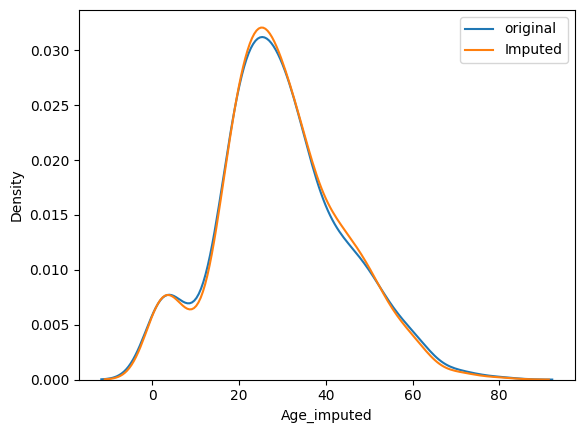

In [17]:
sns.distplot(x_train['Age'] , label='original' , hist = False)
sns.distplot(x_train['Age_imputed'],label='Imputed' , hist=False)
plt.legend()
plt.show()

In [19]:
print('original variable variance : ' , x_train['Age'].var() )
print("variance after random imputation : " , x_train['Age_imputed'].var())

original variable variance :  210.2517072477435
variance after random imputation :  201.01717735425655


In [20]:
x_train[['Fare' , 'Age' , 'Age_imputed']].cov()

,Fare,Age,Age_imputed
Fare,2700.831981,71.580633,54.735159
Age,71.580633,210.251707,210.251707
Age_imputed,54.735159,210.251707,201.017177


<Axes: >

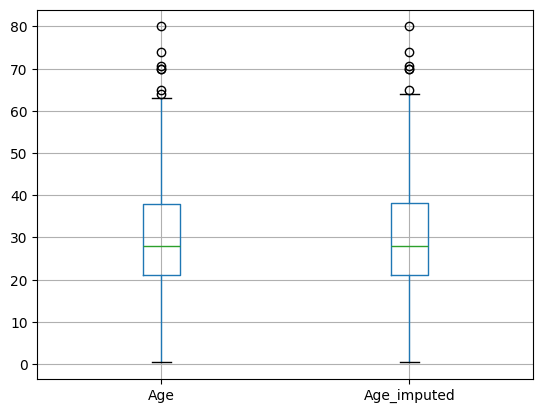

In [21]:
x_train[['Age' , 'Age_imputed']].boxplot()

In [23]:
# Select an observation, for example the first row of x_train
observation = x_train.iloc[0]

sampled_value = x_train['Age'].dropna().sample(1, random_state=int(observation['Fare']))

In [24]:
data = pd.read_csv('house-train.csv',usecols=['GarageQual','FireplaceQu', 'SalePrice'])

In [25]:
data.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [26]:

data.isnull().mean() * 100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

In [27]:

X = data
y = data['SalePrice']

In [28]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [29]:
X_train['GarageQual_imputed'] = X_train['GarageQual']
X_test['GarageQual_imputed'] = X_test['GarageQual']

X_train['FireplaceQu_imputed'] = X_train['FireplaceQu']
X_test['FireplaceQu_imputed'] = X_test['FireplaceQu']

In [30]:
X_train.sample(5)

,FireplaceQu,GarageQual,SalePrice,GarageQual_imputed,FireplaceQu_imputed
821,NaN,TA,93000,TA,NaN
1014,Gd,TA,119200,TA,Gd
117,NaN,TA,155000,TA,NaN
1017,Ex,TA,187500,TA,Ex
1064,Po,TA,154000,TA,Po


In [31]:
X_train['GarageQual_imputed'][X_train['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_train['GarageQual'].isnull().sum()).values
X_test['GarageQual_imputed'][X_test['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_test['GarageQual'].isnull().sum()).values

X_train['FireplaceQu_imputed'][X_train['FireplaceQu_imputed'].isnull()] = X_train['FireplaceQu'].dropna().sample(X_train['FireplaceQu'].isnull().sum()).values
X_test['FireplaceQu_imputed'][X_test['FireplaceQu_imputed'].isnull()] = X_train['FireplaceQu'].dropna().sample(X_test['FireplaceQu'].isnull().sum()).values

C:\Users\Administrator\AppData\Local\Temp\ipykernel_652\856878696.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  X_train['GarageQual_imputed'][X_train['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_train['Gara

In [32]:
temp = pd.concat(
        [
            X_train['GarageQual'].value_counts() / len(X_train['GarageQual'].dropna()),
            X_train['GarageQual_imputed'].value_counts() / len(X_train)
        ],
        axis=1)

temp.columns = ['original', 'imputed']

In [33]:

temp

,original,imputed
TA,0.951043,0.951199
Fa,0.037171,0.036815
Gd,0.009973,0.010274
Po,0.000907,0.000856
Ex,0.000907,0.000856


In [34]:

temp = pd.concat(
        [
            X_train['FireplaceQu'].value_counts() / len(X_train['FireplaceQu'].dropna()),
            X_train['FireplaceQu_imputed'].value_counts() / len(df)
        ],
        axis=1)

temp.columns = ['original', 'imputed']

In [35]:
temp

,original,imputed
Gd,0.494272,0.655443
TA,0.412439,0.534231
Fa,0.040917,0.053872
Po,0.027823,0.034792
Ex,0.024550,0.032548


C:\Users\Administrator\AppData\Local\Temp\ipykernel_652\1827688635.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[X_train['FireplaceQu'] == category]['SalePrice'],hist=False,label=category)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_652\1827688635.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de441

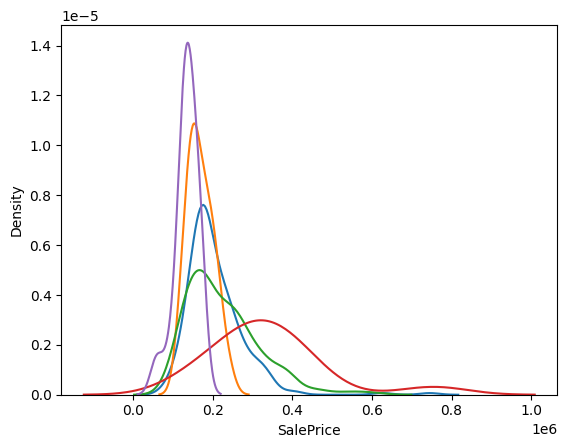

In [36]:
for category in X_train['FireplaceQu'].dropna().unique():
    sns.distplot(X_train[X_train['FireplaceQu'] == category]['SalePrice'],hist=False,label=category)
plt.show()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_652\722808554.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[X_train['FireplaceQu_imputed'] == category]['SalePrice'],hist=False,label=category)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_652\722808554.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom

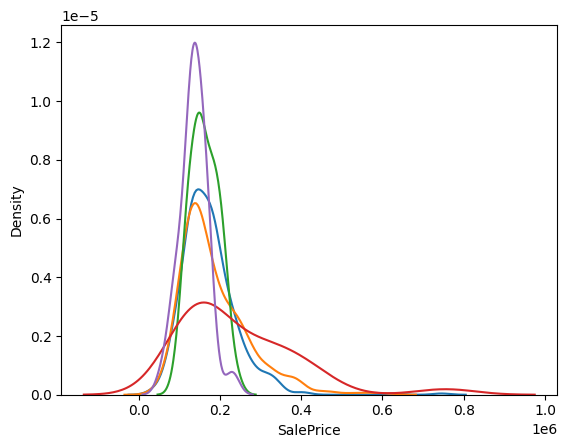

In [37]:
for category in X_train['FireplaceQu_imputed'].dropna().unique():
    sns.distplot(X_train[X_train['FireplaceQu_imputed'] == category]['SalePrice'],hist=False,label=category)
plt.show()